In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [41]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## 1.Data Preprocessing:
### We loaded the data and firstly look at the overall data to judge whether there are missing values, and we will also gain a general impression and understanding of the data columns.

In [42]:
df=pd.read_csv('/Users/dylanbai/Desktop/Data Science2/Customer_Data.csv')

In [43]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [45]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)
df.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [47]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### the column 'CUST_ID' is the customer's unique ID and doesn't make much sense to the overall data and model，so we can drop it.

In [48]:
df.drop('CUST_ID', axis=1, inplace=True)

### next，we looked into the outliers and decided whether we can drop it.

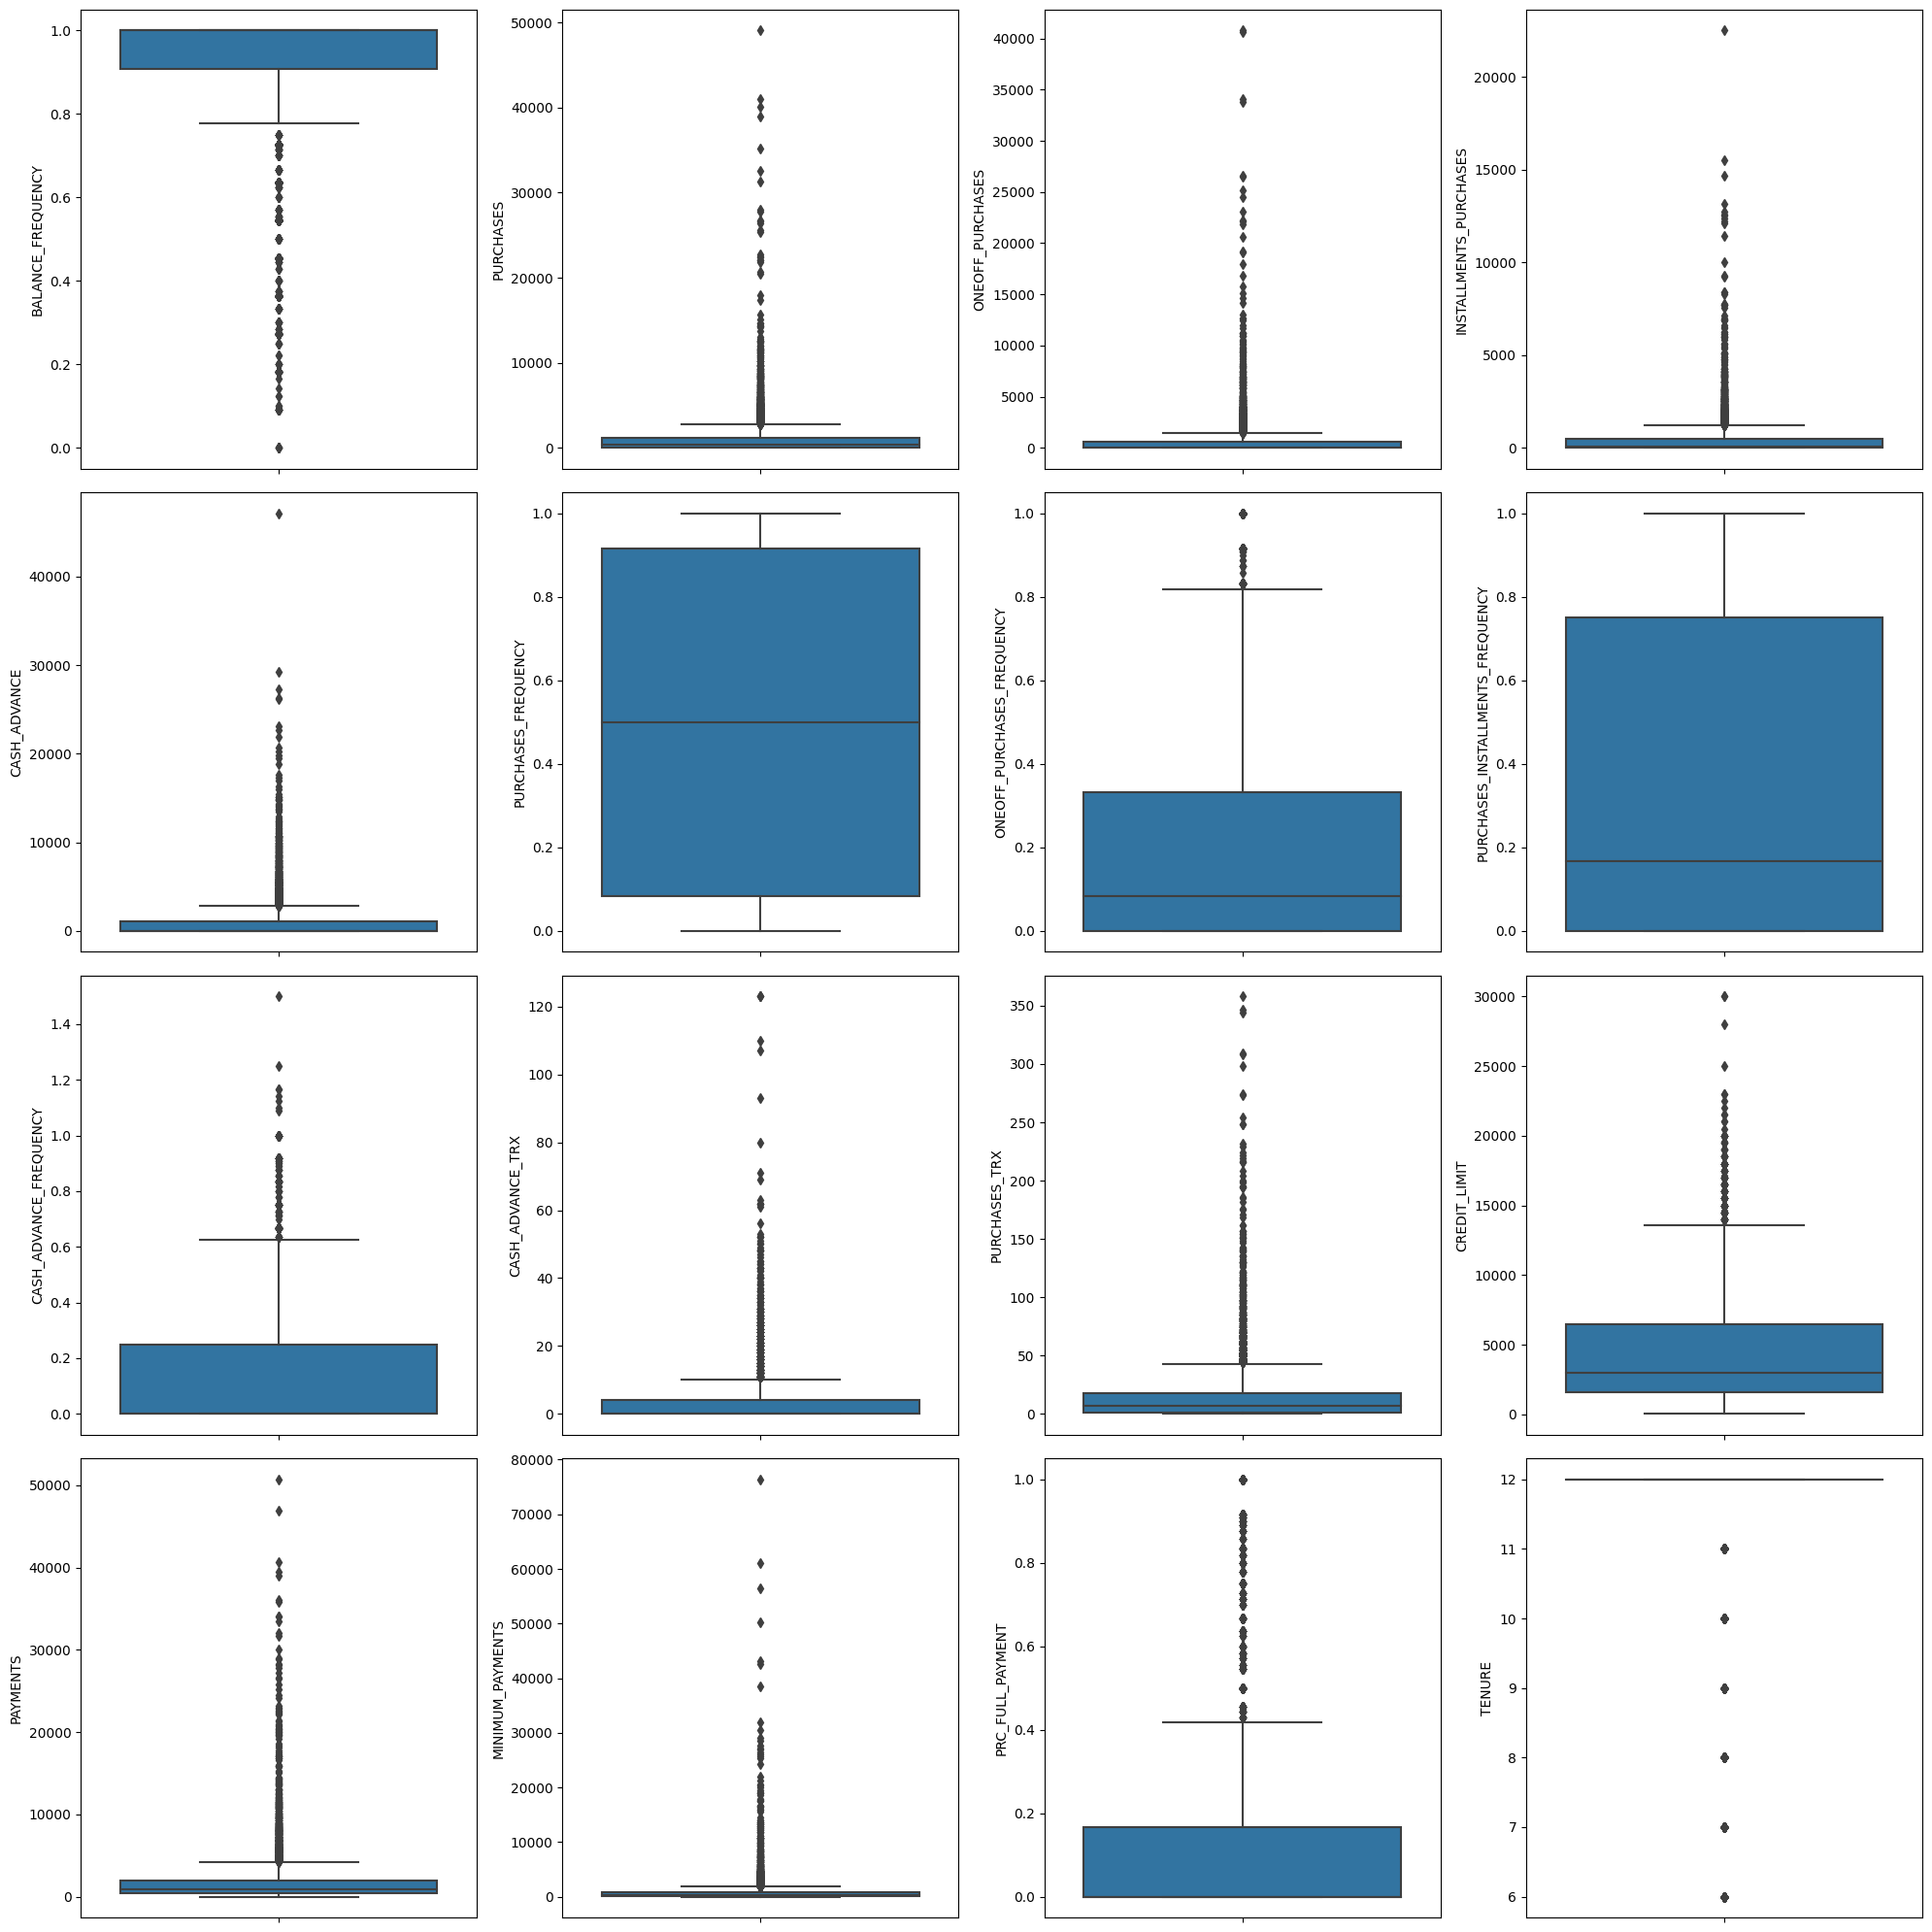

In [49]:
# Check outliers: numeric features
import seaborn as sns
# Create a 4x4 grid of subplots
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(4, 4, figsize=(20, 20))

# Plot each boxplot
sns.boxplot(y='BALANCE_FREQUENCY', ax=ax1, data=df)
sns.boxplot(y='PURCHASES', ax=ax2, data=df)
sns.boxplot(y='ONEOFF_PURCHASES', ax=ax3, data=df)
sns.boxplot(y='INSTALLMENTS_PURCHASES', ax=ax4, data=df)
sns.boxplot(y='CASH_ADVANCE', ax=ax5, data=df)
sns.boxplot(y='PURCHASES_FREQUENCY', ax=ax6, data=df)
sns.boxplot(y='ONEOFF_PURCHASES_FREQUENCY', ax=ax7, data=df)
sns.boxplot(y='PURCHASES_INSTALLMENTS_FREQUENCY', ax=ax8, data=df)
sns.boxplot(y='CASH_ADVANCE_FREQUENCY', ax=ax9, data=df)
sns.boxplot(y='CASH_ADVANCE_TRX', ax=ax10, data=df)
sns.boxplot(y='PURCHASES_TRX', ax=ax11, data=df)
sns.boxplot(y='CREDIT_LIMIT', ax=ax12, data=df)
sns.boxplot(y='PAYMENTS', ax=ax13, data=df)
sns.boxplot(y='MINIMUM_PAYMENTS', ax=ax14, data=df)
sns.boxplot(y='PRC_FULL_PAYMENT', ax=ax15, data=df)
sns.boxplot(y='TENURE', ax=ax16, data=df)

# Optionally, adjust the layout
plt.tight_layout()
plt.show()

In [50]:
#drop the outliers
PURCHASES_outliers=df[df['PURCHASES']>20000].index
df.drop(PURCHASES_outliers,inplace=True)

ONEOFF_PURCHASES_outliers=df[df['ONEOFF_PURCHASES']>20000].index
df.drop(ONEOFF_PURCHASES_outliers,inplace=True)

INSTALLMENTS_PURCHASES_outliers=df[df['INSTALLMENTS_PURCHASES']>10000].index
df.drop(INSTALLMENTS_PURCHASES_outliers,inplace=True)

CASH_ADVANCE_outliers=df[df['CASH_ADVANCE']>20000].index
df.drop(CASH_ADVANCE_outliers,inplace=True)

CREDIT_LIMIT_outliers=df[df['CREDIT_LIMIT']>20000].index
df.drop(CREDIT_LIMIT_outliers,inplace=True)

PAYMENTS_outliers=df[df['PAYMENTS']>30000].index
df.drop(PAYMENTS_outliers,inplace=True)

MINIMUM_PAYMENTS_outliers=df[df['MINIMUM_PAYMENTS']>30000].index
df.drop(MINIMUM_PAYMENTS_outliers,inplace=True)


### The features of the dataset exhibit high correlation (multicollinearity) and our dataset has a high number of dimensions (meaning a large number of features)，so we should drop some highly correlated columns to reduce the dimensinality.

<Axes: >

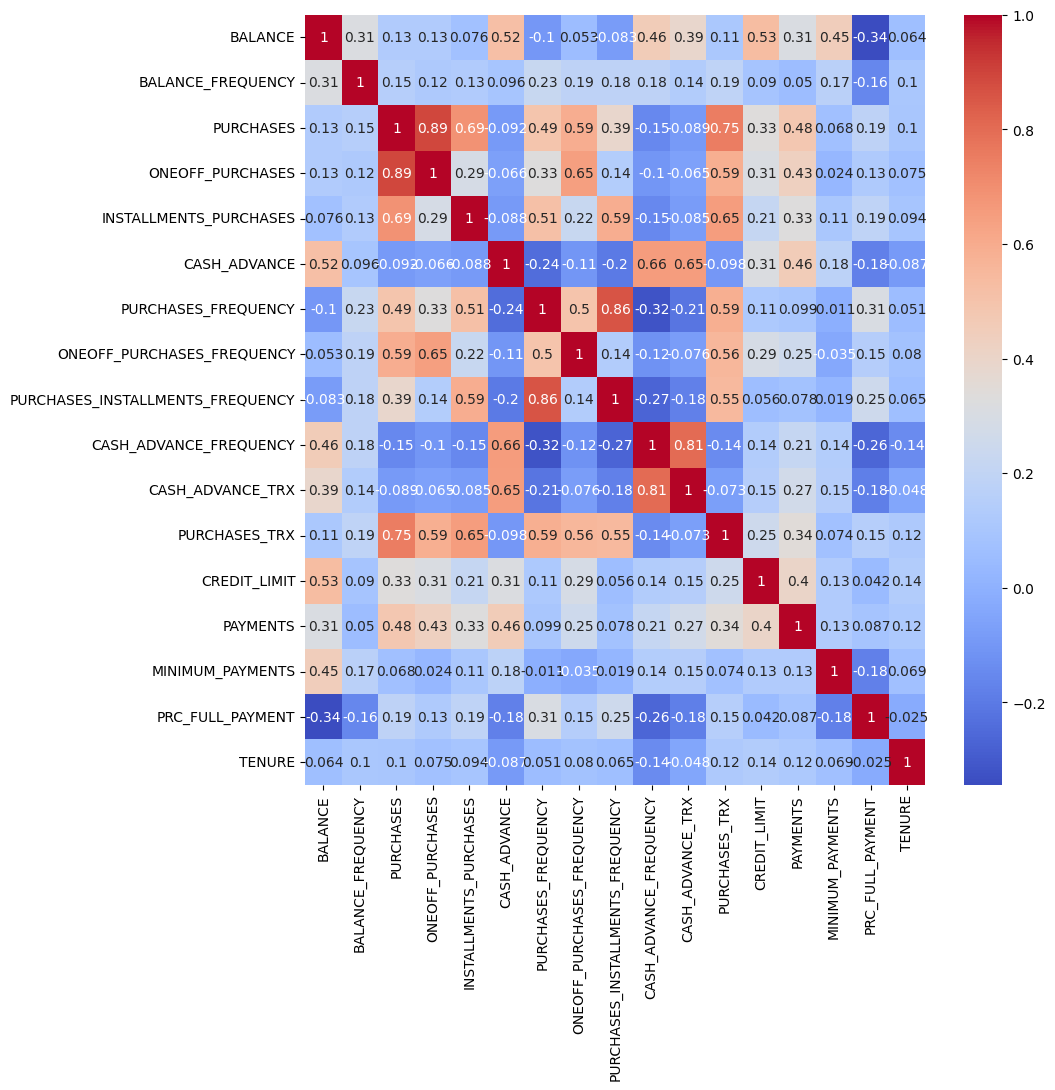

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### From the information above, we can draw a conclusion that we should drop the 'PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY' columns.

In [52]:
df.drop('PURCHASES_FREQUENCY',axis=1, inplace=True)
df.drop('CASH_ADVANCE_TRX',axis=1, inplace=True)
df.drop('PURCHASES_INSTALLMENTS_FREQUENCY',axis=1, inplace=True)
df.drop('CASH_ADVANCE_FREQUENCY',axis=1, inplace=True)

## 2. EDA of the features
### we can use histplot to show how is the features' distribution and will get a general expectation of the clustering.
### From the histplot, we can see the features have non-uniform distributions, not following a normal distribution, and exhibit significant skewness. Therefore, the clustering result will have one cluster that is notably larger.

(array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 [Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9'),
  Text(10.0, 0, '10'),
  Text(11.0, 0, '11'),
  Text(12.0, 0, '12'),
  Text(13.0, 0, '13')])

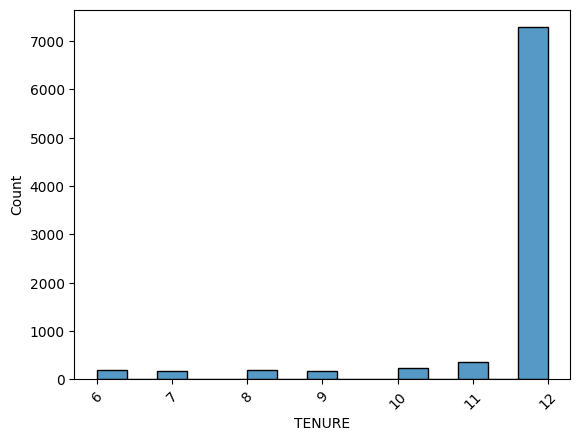

In [53]:
sns.histplot(data=df['TENURE'])
plt.xticks(rotation=45)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

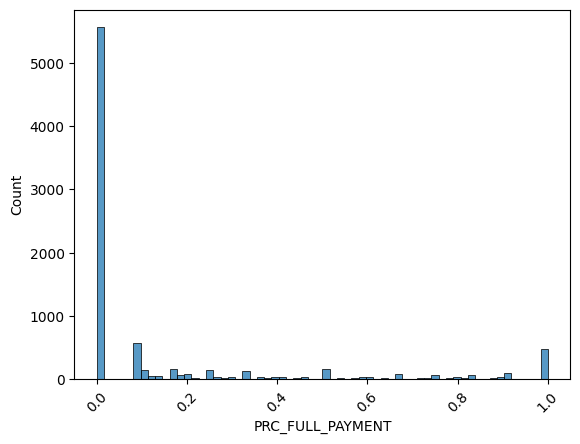

In [54]:
sns.histplot(data=df['PRC_FULL_PAYMENT'])
plt.xticks(rotation=45)

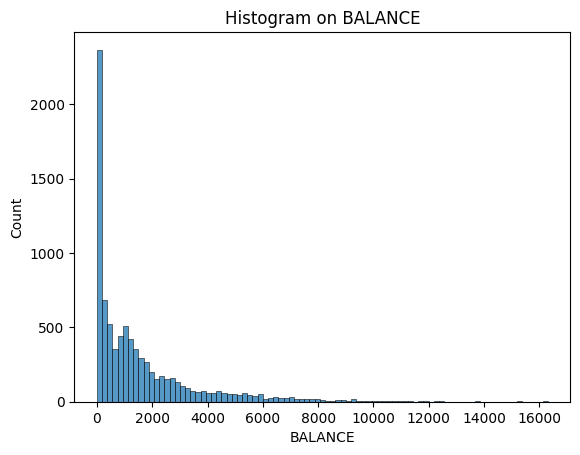

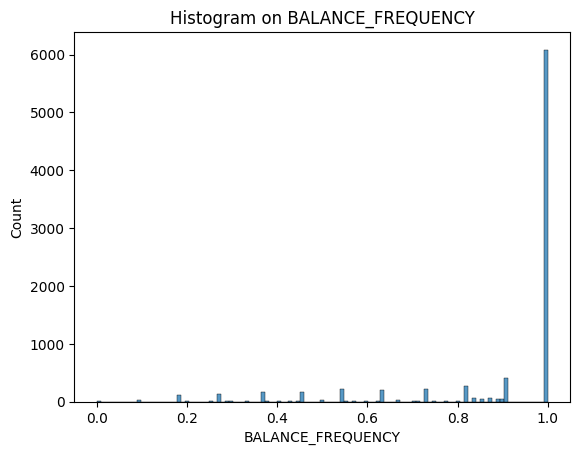

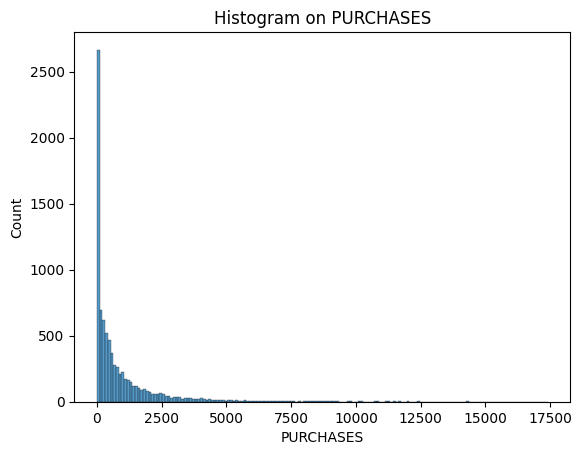

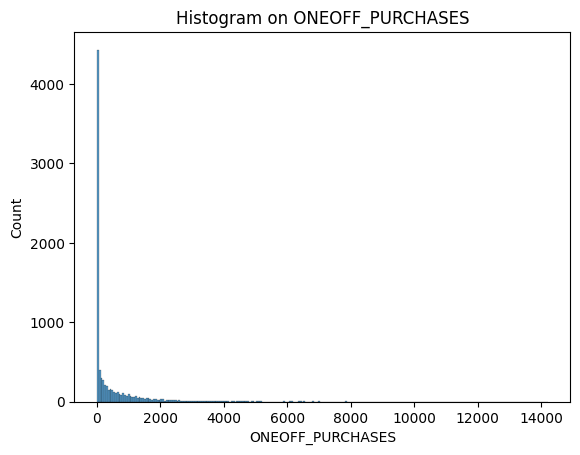

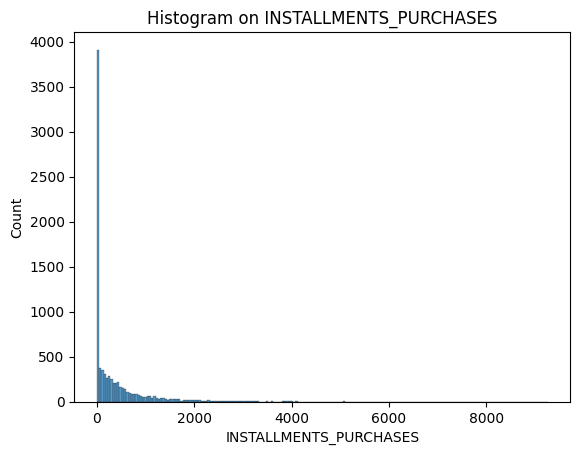

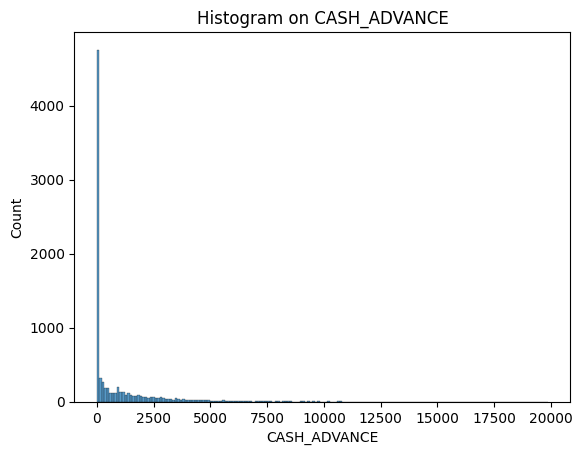

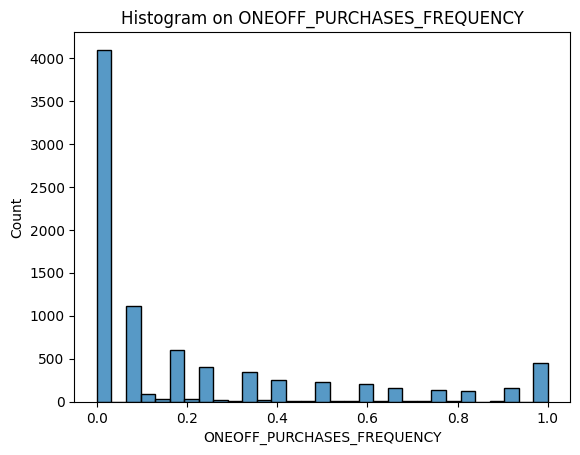

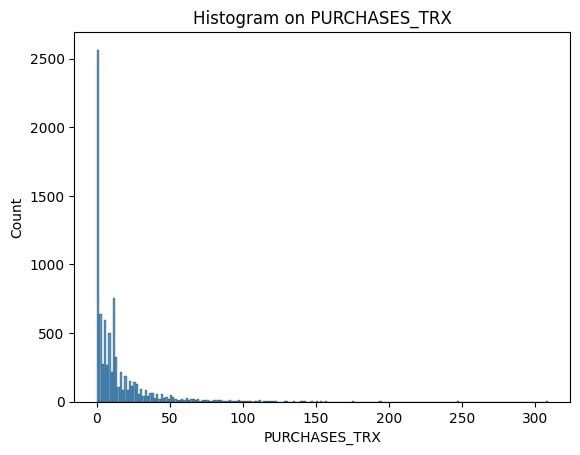

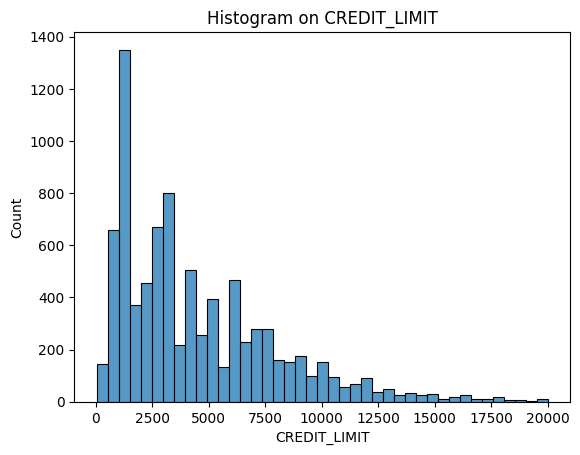

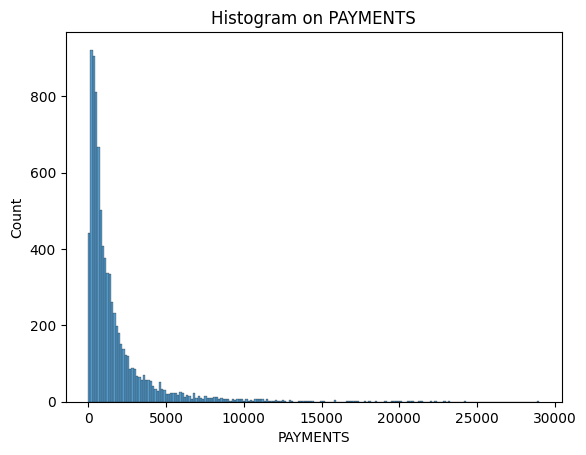

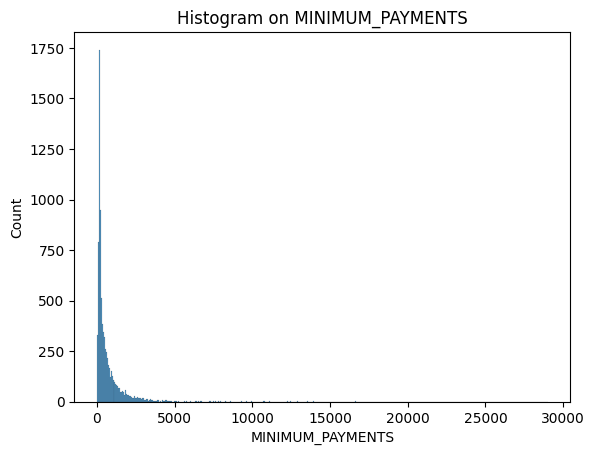

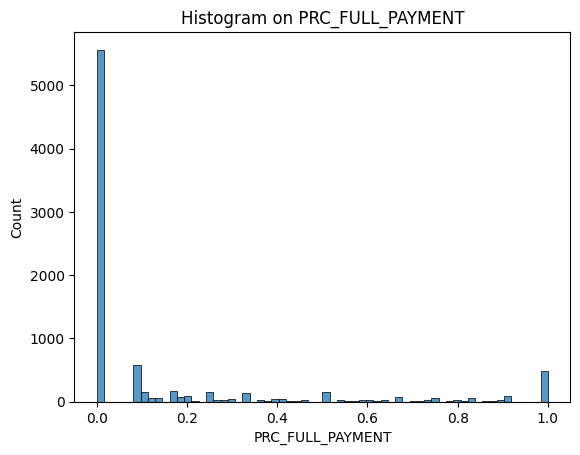

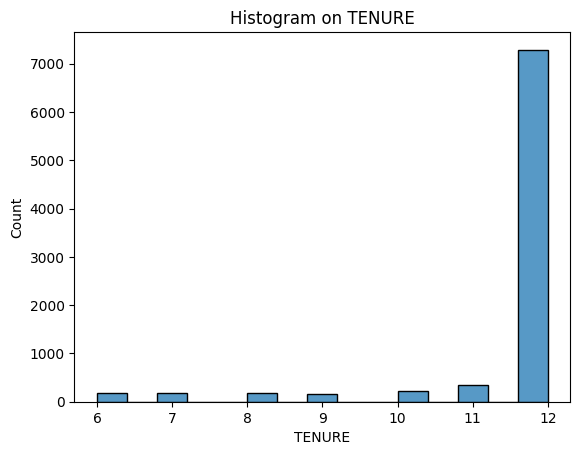

In [55]:
for i in df.columns:
    sns.histplot(data=df, x=i)
    plt.title(f"Histogram on {i}")
    plt.show()

## 3. Clustering Algorithms：
### we use Kmeans，Hierarchical Clustering and DBSCAN to do the clustering. Comapring the elbow method,Silhouette Score to determine the number of clustering.
### Since the dataset is unbalance and the differences in scale between features can affect the performance of algorithms，it is necessary to normalize the features to make them have similar scales.

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [57]:
X = np.array(scaled_df)

### Apply the K-means method，and use the elbow method and silhouette score to figure out the better number of the clusters。
### From the graph，we can say the best number of cluster is 3 and the silhouette score is around 0.31.

In [58]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

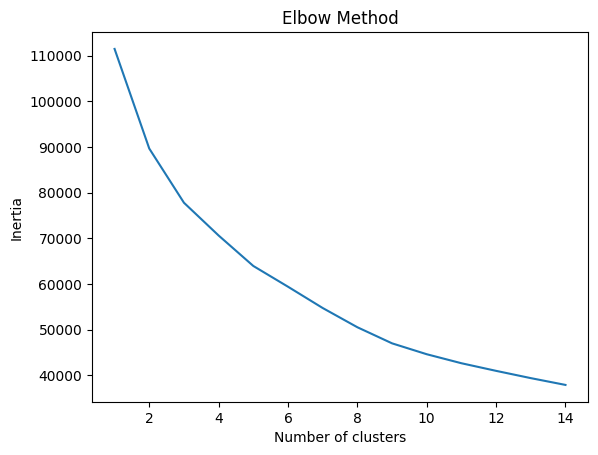

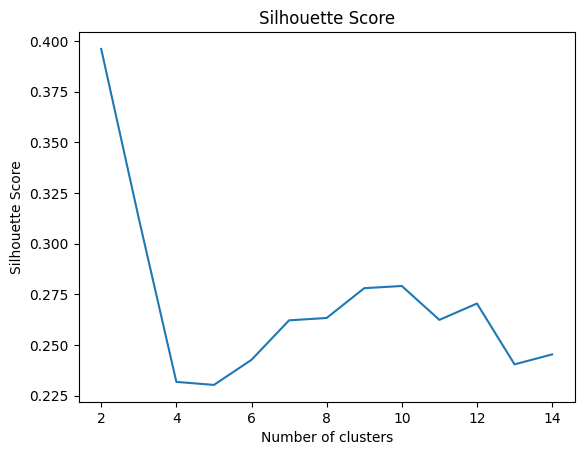

Silhouette Score: 0.24534061830388093


(0.0, 0.44605090456457636)

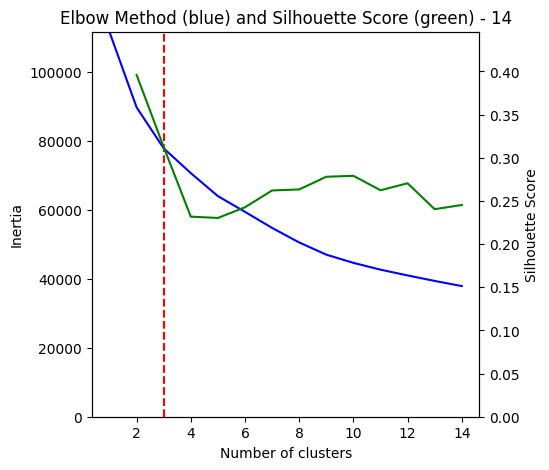

In [59]:
inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(X, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Silhouette Score
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

#plot the elbow method curve to find the optimal number of cluster
fig, axes = plt.subplots(1,1, figsize=(5,5))
axes.plot(range(1, 15), inertia, color='blue')
axes.set_title(f'Elbow Method (blue) and Silhouette Score (green) - {i}')
axes.set_xlabel('Number of clusters')
axes.set_ylabel('Inertia')
axes.axvline(x=3, color = 'red', linestyle = '--')

#plot the silhouette score curve to find the optimal number of cluster
axes2 = axes.twinx()
axes2.plot(range(2, 15), silhouette_avg, color='green')
axes2.set_ylabel('Silhouette Score')

# Set y-axis limits to start from zero
axes.set_ylim(0, max(inertia) + 100)
axes2.set_ylim(0, max(silhouette_avg) + 0.05)

In [60]:
# Applying K-means with 3 clusters and k-mean++ initialization (i.e. the default parameter)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels_km = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(X, labels_km)
print(f"KMean Silhouette Score: {sil_score}")



/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMean Silhouette Score: 0.31245605379746827


### count the number of samples in each cluster.

In [61]:

from collections import Counter
cluster_counts_km = Counter(labels_km)

for label, count in cluster_counts_km.items():
    print(f"Cluster {label}, Count: {count}")

Cluster 1, Count: 6348
Cluster 0, Count: 1188
Cluster 2, Count: 1039


### Apply the Hierarchical Clustering method. Use the Silhouette Score to determine the performance and the best number of cluster.
### From the result, we can say the score is around 0.21 and number of cluster is 10.

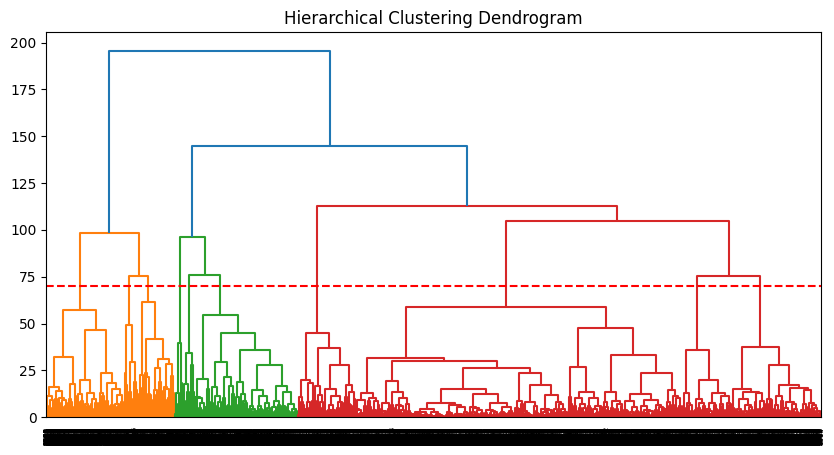

In [62]:
# Importing required libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate linkage matrix
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.axhline(y=70, color = 'red', linestyle = '--')
plt.show()

In [63]:
from scipy.cluster.hierarchy import fcluster

hc_clusters = fcluster(Z, t=10, criterion='maxclust')


# Count the number of samples in each cluster
cluster_counts_hc = Counter(hc_clusters)

print(f"Hierarchical clustering Silhouette Score: {silhouette_score(X, hc_clusters, metric='euclidean')}")
for label, count in cluster_counts_hc.items():
    if label == -1:
        print(f"Cluster: Noise, Count: {count}")
    else:
        print(f"Cluster {label}, Count: {count}")

Hierarchical clustering Silhouette Score: 0.20457095656525104
Cluster 10, Count: 988
Cluster 6, Count: 1152
Cluster 8, Count: 3621
Cluster 2, Count: 171
Cluster 1, Count: 865
Cluster 3, Count: 394
Cluster 7, Count: 629
Cluster 4, Count: 84
Cluster 5, Count: 125
Cluster 9, Count: 546


/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Affinity Propagation Silhouette Score: 0.13402559950027954


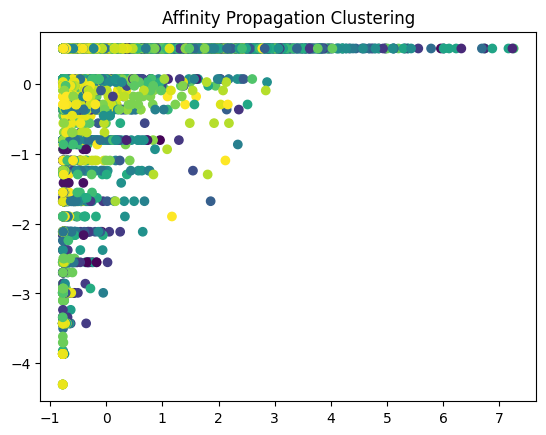

In [64]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X)

# Silhouette Score
af_sil_score = silhouette_score(X, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=af_labels)
plt.title('Affinity Propagation Clustering')
plt.show()

### Apply the DBSCAN, and use the silhouette score to see the performance and determine the best number of cluster.
### From the result, we can say that the silhouette score is -0.4, which is the worst, and the number of cluster is 37, the majority of which has smaller samples.

DBSCAN Silhouette Score: -0.4217465772509238


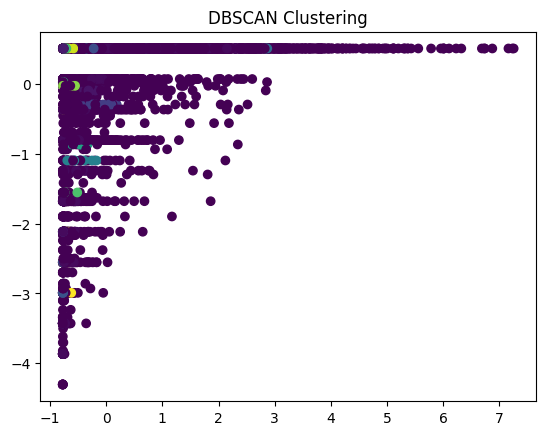

In [65]:
# Importing required library
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Silhouette Score
#Note: DBSCAN can result in noise data point with label -1
#Only include points that are part of a cluster
if len(set(dbscan_labels)) > 1:
    dbscan_sil_score = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil_score}")

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

In [66]:
from collections import Counter

dbscan = DBSCAN()
cluster_labels = dbscan.fit_predict(X)

# Count the number of samples in each cluster
cluster_counts = Counter(cluster_labels)

# Print the cluster labels and their respective sample counts
for label, count in cluster_counts.items():
    if label == -1:
        print(f"Cluster: Noise, Count: {count}")
    else:
        print(f"Cluster {label}, Count: {count}")

Cluster 0, Count: 2987
Cluster: Noise, Count: 5249
Cluster 11, Count: 8
Cluster 1, Count: 12
Cluster 10, Count: 5
Cluster 2, Count: 7
Cluster 3, Count: 58
Cluster 4, Count: 6
Cluster 5, Count: 6
Cluster 13, Count: 5
Cluster 6, Count: 12
Cluster 35, Count: 8
Cluster 24, Count: 5
Cluster 17, Count: 15
Cluster 23, Count: 8
Cluster 7, Count: 3
Cluster 8, Count: 18
Cluster 14, Count: 6
Cluster 36, Count: 6
Cluster 15, Count: 5
Cluster 32, Count: 5
Cluster 9, Count: 36
Cluster 12, Count: 3
Cluster 21, Count: 9
Cluster 33, Count: 6
Cluster 38, Count: 5
Cluster 16, Count: 8
Cluster 30, Count: 8
Cluster 18, Count: 5
Cluster 19, Count: 6
Cluster 20, Count: 5
Cluster 29, Count: 6
Cluster 22, Count: 5
Cluster 25, Count: 5
Cluster 27, Count: 5
Cluster 26, Count: 10
Cluster 28, Count: 4
Cluster 31, Count: 7
Cluster 34, Count: 5
Cluster 37, Count: 3


### From all the results above, we can say the K-means has the best performance, which has the highest silhouette score. And the number of cluster is 3 and the samples in each cluster is reasonable.

## 4. Interpreting Clusters:
### A box plot is created to show the distribution within each cluster for each feature. Additionally, the cluster centers for the selected features are visualized using a heatmap, providing a clear overview of feature values for each cluster.

In [67]:
cluster_labels=kmeans.fit_predict(X)
df['cluster'] = cluster_labels 
df.groupby('cluster').mean().T



/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster,0,1,2
BALANCE,4904.463937,858.413754,2094.214737
BALANCE_FREQUENCY,0.966485,0.867868,0.977987
PURCHASES,483.845862,501.213229,4150.912311
ONEOFF_PURCHASES,256.385988,245.595773,2719.847456
INSTALLMENTS_PURCHASES,227.534685,255.924238,1431.692515
CASH_ADVANCE,4032.004561,457.187075,529.829022
ONEOFF_PURCHASES_FREQUENCY,0.121448,0.138513,0.701813
PURCHASES_TRX,7.880572,8.920812,57.153772
CREDIT_LIMIT,8085.579937,3261.015993,7563.974855
PAYMENTS,3438.871359,953.007053,3964.624215


In [68]:
cluster_sizes = df['cluster'].value_counts()

# Print cluster sizes
print("Cluster Sizes:")
print(cluster_sizes)

Cluster Sizes:
cluster
1    6352
0    1189
2    1034
Name: count, dtype: int64


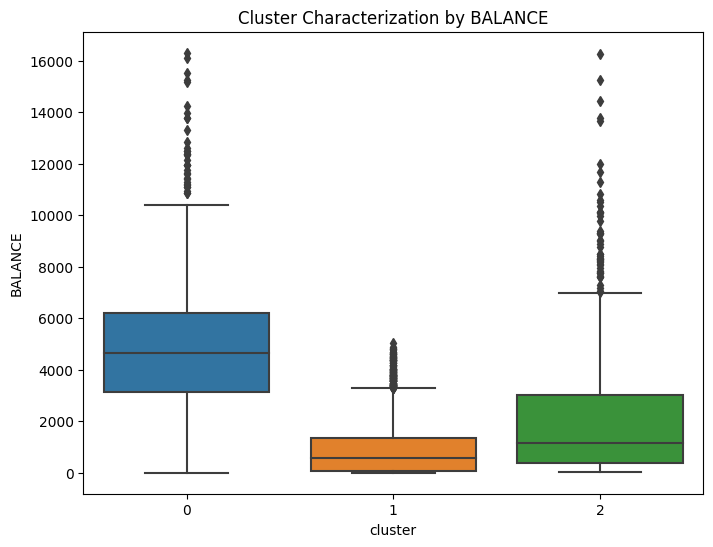

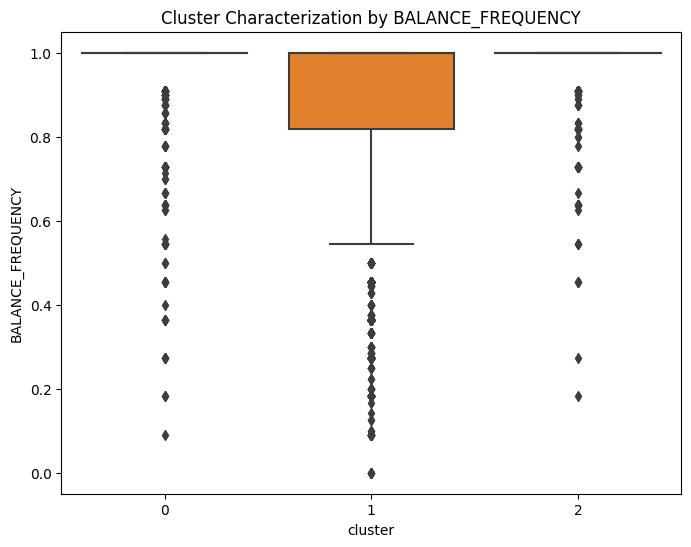

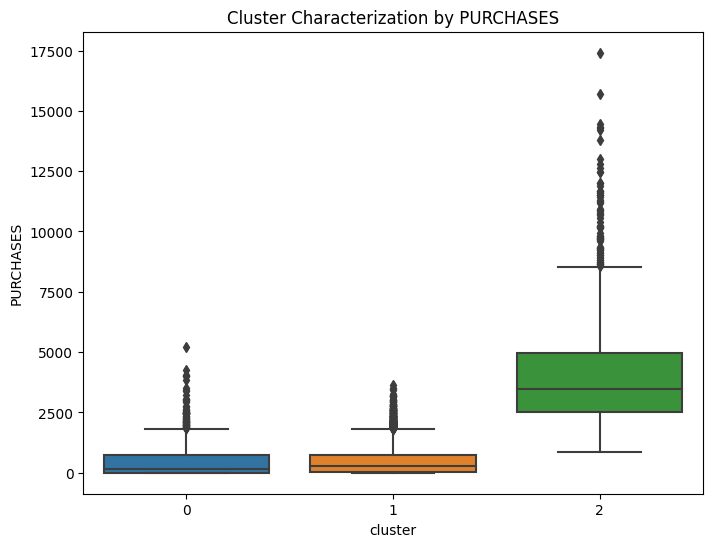

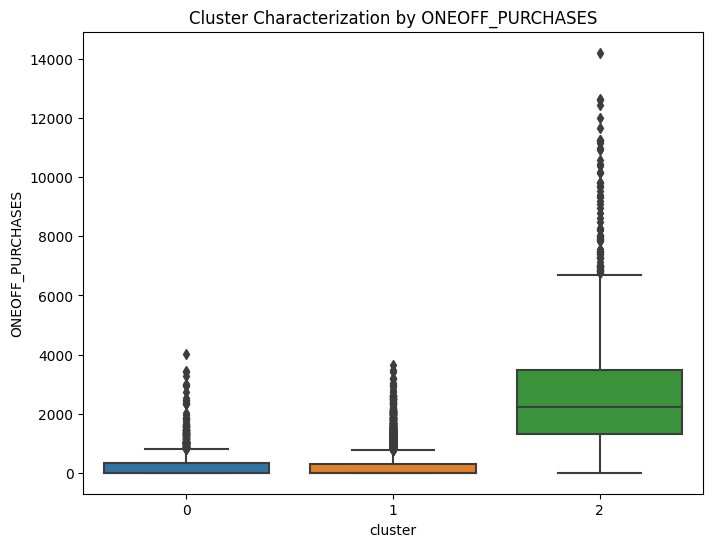

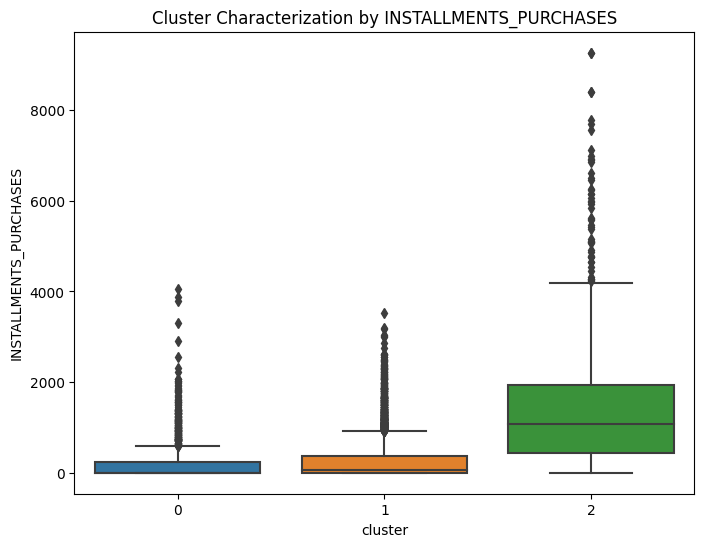

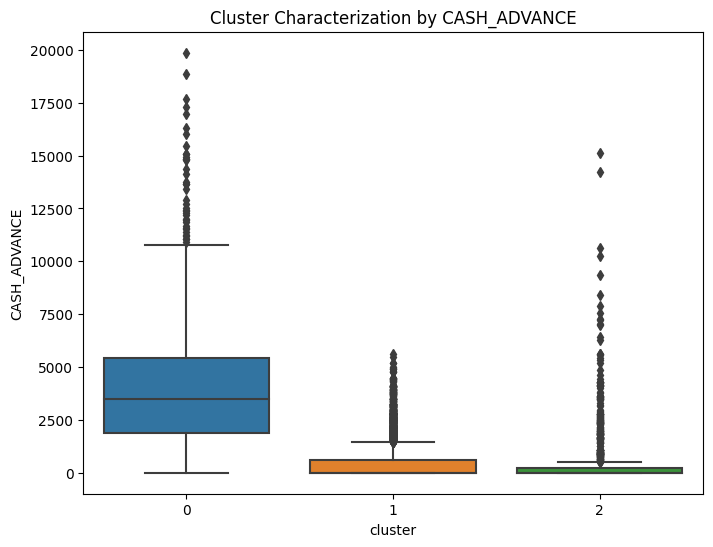

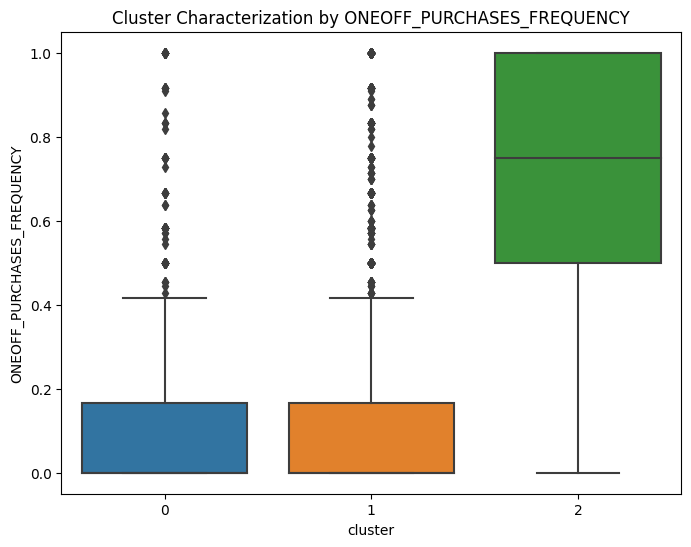

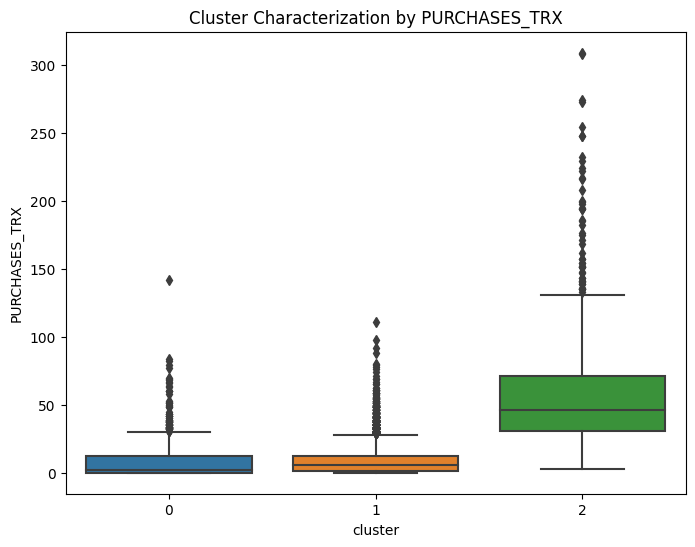

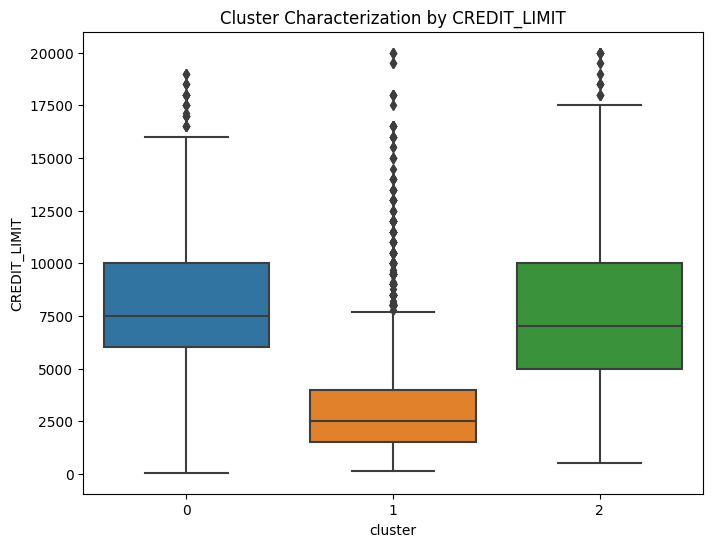

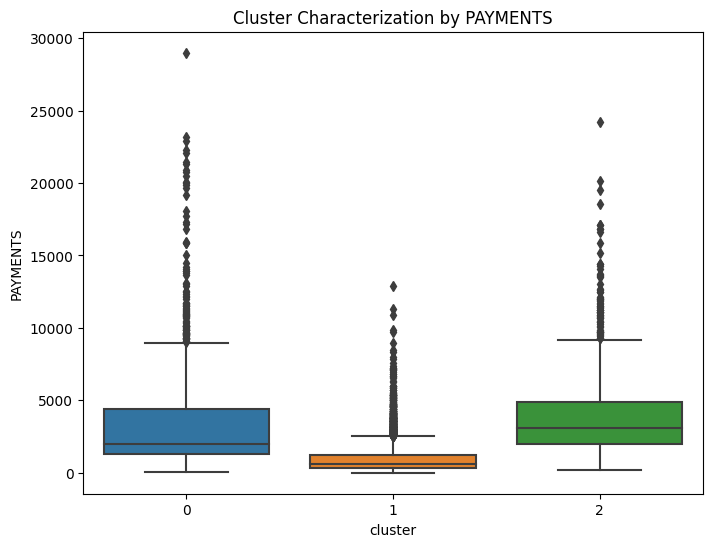

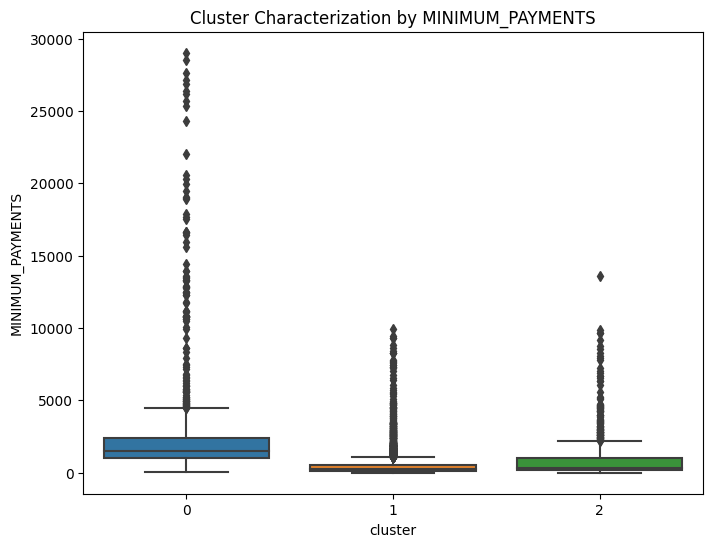

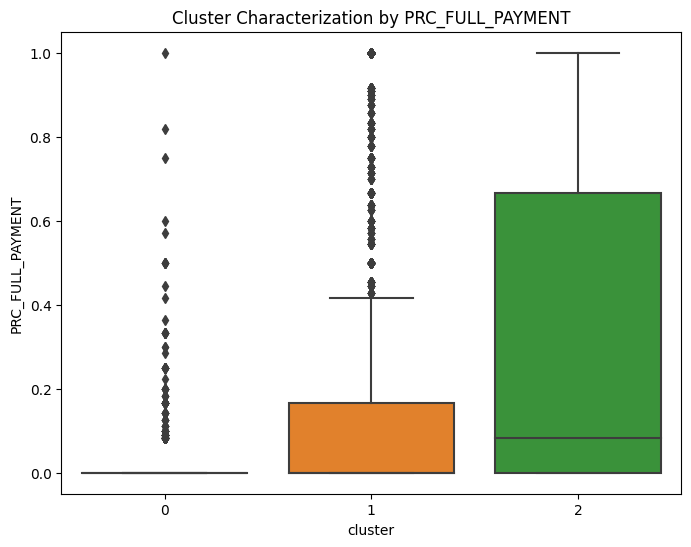

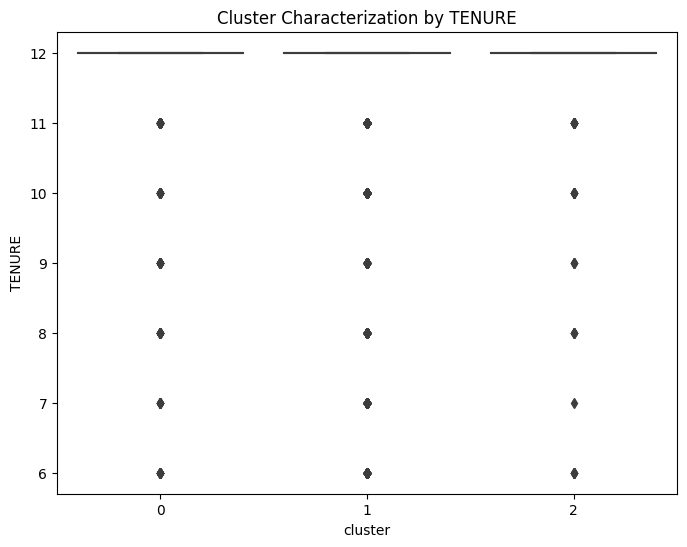

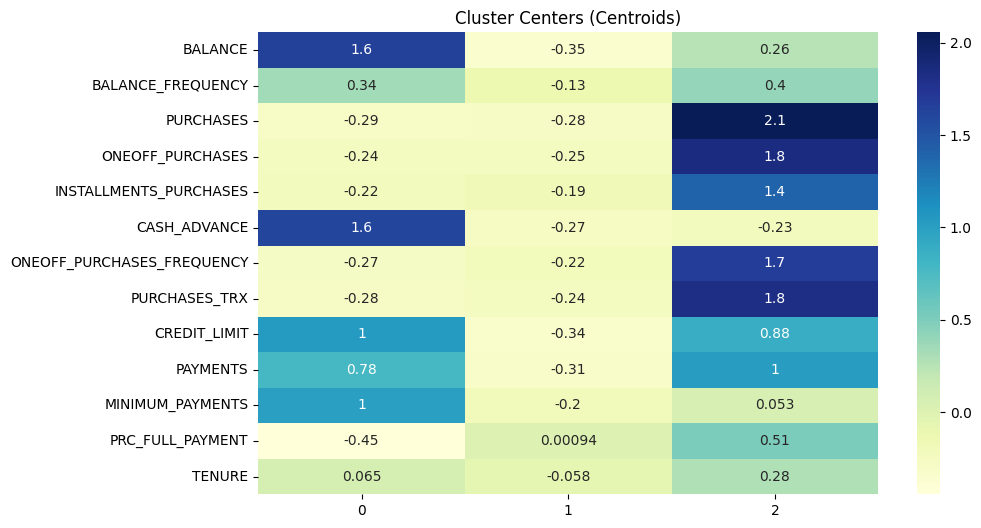

In [69]:
features_to_visualize = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']  # Add more features as needed

for feature in features_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Cluster Characterization by {feature}')
    plt.show()

# Additionally, you can visualize the cluster centers (centroids) for numerical features
# Assuming you have the cluster centers from the trained K-means model
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame for cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features_to_visualize)

# Visualize cluster centers using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.T, annot=True, cmap='YlGnBu', yticklabels=features_to_visualize)
plt.title('Cluster Centers (Centroids)')
plt.show()




### From the information above, we can say:
### (1) For Cluster 1, the'BALANCE' and 'CASH_ADVANCE' have higher value, indicating they are characteristic of that cluster. It suggests that customers in Cluster 1 have high balance and cash advance compared to the other clusters.
### (2) For Cluster 2, the 'PRC_FULL_PAYMENT' has the highest value so the customers of the cluster 2 are more likely to make full payments.
### (3) For Cluster 3, the 'PURCHASES', 'ONEOFF_PURCHASES' AND 'PURCHASES_TRX' have higher value, indicating the customers in cluster 3 are more likely to make purchases and they will spend more money on shopping.

## 5.Actionable Insights：
### Cluster 1:
### Customers in this cluster have high balances and cash advances. They are likely to be users who maintain high account balances and frequently use cash advance features. Business recommendations for this cluster could include offering them premium banking services, cash advance promotions, or credit card upgrade offers to cater to their financial needs.

### Cluster 2:
### Customers in this cluster have a high probability of making full payments. They are responsible users who tend to clear their balances each month. To target this segment, the focus could be on loyalty programs, encouraging them to continue their responsible payment behavior, and providing incentives for full payments, such as cashback rewards or discounts on future purchases.

### Cluster 3:
### Customers in this cluster are active shoppers, making both one-off and regular purchases. They are likely to be frequent buyers who spend a significant amount on shopping. Targeted marketing strategies for this group could include personalized product recommendations, exclusive deals on popular items, and loyalty programs to encourage repeat purchases.

## Business Recommendations:

### Targeted Promotions: Tailor promotions based on each cluster's characteristics. For Cluster 1, focus on credit and cash advance offers. For Cluster 2, emphasize responsible credit usage benefits. For Cluster 3, offer discounts and rewards related to shopping categories they frequently engage with.

### Customer Engagement: Engage customers through targeted communication channels. Cluster 1 might respond well to personalized financial consultations, whereas Cluster 3 might prefer mobile app notifications about ongoing sales events.

### Product Customization: Customize products and services based on clusters. For example, develop credit products with attractive interest rates for Cluster 1, design loyalty programs for Cluster 2, and collaborate with retailers for exclusive deals for Cluster 3.

### Feedback Loops: Regularly collect feedback to refine cluster definitions and marketing strategies. Customer surveys, transaction analyses, and social media monitoring can provide valuable insights.


